# Early Stage Management Output Inspector

This notebook validates and visualizes model outputs for `early_stage_management_answer`.

Expected output columns:
- `model_response`
- `cumulative_logprob`
- `log_probs`

In [1]:
import os
import sys
from pathlib import Path

print('Python executable:', sys.executable)
print('Python version:', sys.version.split()[0])

if '/vista_eval_vlm/.venv/' not in sys.executable:
    print('WARNING: Not using vista_eval_vlm .venv interpreter.')
else:
    print('OK: Running from vista_eval_vlm .venv')

REPO_ROOT = Path('/home/ryannayebi/vista_eval_vlm')
print('Repo root:', REPO_ROOT)


Python executable: /home/ryannayebi/vista_eval_vlm/.venv/bin/python3
Python version: 3.11.14
OK: Running from vista_eval_vlm .venv
Repo root: /home/ryannayebi/vista_eval_vlm


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_theme(style='whitegrid')
except Exception:
    sns = None

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 200)


In [3]:
# Optional override:
# export VISTA_TASK_RESULTS_DIR=/some/path/early_stage_management_answer

override = os.environ.get('VISTA_TASK_RESULTS_DIR')
candidates = [
    Path('/home/ryannayebi/vista_project/results_v1_2/tb_v1_1tb_classification_tasks/early_stage_management_answer'),
    REPO_ROOT / 'results_v1_2' / 'tb_v1_1tb_classification_tasks' / 'early_stage_management_answer',
]

if override:
    TASK_DIR = Path(override)
else:
    TASK_DIR = next((p for p in candidates if p.exists()), candidates[0])

print('TASK_DIR:', TASK_DIR)
assert TASK_DIR.exists(), f'Missing task dir: {TASK_DIR}'

all_csvs = sorted(TASK_DIR.glob('*/*_results_*.csv'))
result_csvs = [
    p for p in all_csvs
    if '.prev' not in p.name and 'backup' not in p.name
]

print('All result-like CSVs found:', len(all_csvs))
print('Filtered active result CSVs:', len(result_csvs))
for p in result_csvs:
    print(' -', p)


TASK_DIR: /home/ryannayebi/vista_project/results_v1_2/tb_v1_1tb_classification_tasks/early_stage_management_answer
All result-like CSVs found: 4
Filtered active result CSVs: 2
 - /home/ryannayebi/vista_project/results_v1_2/tb_v1_1tb_classification_tasks/early_stage_management_answer/OctoMed-7B/early_stage_management_answer_results_axial_1_image.csv
 - /home/ryannayebi/vista_project/results_v1_2/tb_v1_1tb_classification_tasks/early_stage_management_answer/Qwen3-VL-8B-Instruct/early_stage_management_answer_results_axial_1_image.csv


In [4]:
frames = []
for p in result_csvs:
    df = pd.read_csv(p)
    df['__model'] = p.parent.name
    df['__file'] = p.name
    frames.append(df)

if frames:
    all_df = pd.concat(frames, ignore_index=True)
else:
    all_df = pd.DataFrame()

print('Combined rows:', len(all_df))
print('Combined columns:', list(all_df.columns))
all_df.head(3)


Combined rows: 66
Combined columns: ['person_id', 'split', 'first_tb_encounter_ts', 'label', 'task', 'task_group', 'question', 'label_description', 'answer_strength', 'latest_img_date', '_accession_number', 'note_text', 'modality', 'anatomic_site_source_value', 'image_study_uid', 'image_series_uid', 'local_path', 'nifti_path', 'index', 'embed_time', 'unique_events', 'dynamic_prompt', 'model_response', 'cumulative_logprob', 'log_probs', 'used_image', '__model', '__file']


,person_id,split,first_tb_encounter_ts,label,task,task_group,question,label_description,answer_strength,latest_img_date,_accession_number,note_text,modality,anatomic_site_source_value,image_study_uid,image_series_uid,local_path,nifti_path,index,embed_time,unique_events,dynamic_prompt,model_response,cumulative_logprob,log_probs,used_image,__model,__file
0,135999509,test,2017-03-12 00:00:00 UTC,3,early_stage_management_answer,tb_classification,"Based on the provided medical history and cancer evidence, what is optimal curative-intent treatment for stage I-III NSCLC?",Radiation alone,Definite,2017-03-02,CBCAE35838D00D03,1. Hypermetabolic right upper lobe spiculated nodule concerning for malignancy given interval growth compared to 12/25/2011. 2. Mild FDG activity within a right middle lobe subsolid nodule ...,CT,WHOLE BODY,1.2.840.4267.32.116401962500994992642150923797205892197,1.2.840.4267.32.228246806629162213764604533408690683691,gs://rit-shc-imaging-confidential.starr-data.us/1.2.840.4267.32.116401962500994992642150923797205892197/1.2.840.4267.32.228246806629162213764604533408690683691.zip,/mnt/su-vista-uscentral1/chaudhari_lab/ct_data/ct_scans/vista/nov25/1.2.840.4267.32.116401962500994992642150923797205892197__1.2.840.4267.32.228246806629162213764604533408690683691.nii.gz,5902,2017-03-05,4,You are an oncology decision-support model. Your task is to answer the following QUESTION grounded in a PATIENT's TIMELINE by selecting the correct OPTION in OPTIONS.\n\nQUESTION: Based on the pro...,Radiation alone,-1.060626,"[[{""token_id"": 49, ""logprob"": -0.4493464529514313, ""rank"": 1, ""decoded_token"": ""R""}, {""token_id"": 2320, ""logprob"": -1.6993464231491089, ""rank"": 2, ""decoded_token"": ""System""}], [{""token_id"": 64, ""l...",1,OctoMed-7B,early_stage_management_answer_results_axial_1_image.csv
1,135952427,test,2016-10-12 00:00:00 UTC,-1,early_stage_management_answer,tb_classification,"Based on the provided medical history and cancer evidence, what is optimal curative-intent treatment for stage I-III NSCLC?",Indeterminate/Deferred,Tentative,2016-10-04,AEBBCD24BF0095AD,": 1. Pulmonary nodules measuring up to 8 mm which are unchanged in size and do not demonstrate FDG avidity; nonetheless, these lesions remains suspicious for malignancy based on CT appearance...",CT,NaN,1.2.840.4267.32.159269124308884989289837639930421632368,1.2.840.4267.32.240866130829440402471476269829654193276,gs://rit-shc-imaging-confidential.starr-data.us/1.2.840.4267.32.159269124308884989289837639930421632368/1.2.840.4267.32.240866130829440402471476269829654193276.zip,/mnt/su-vista-uscentral1/chaudhari_lab/ct_data/ct_scans/vista/nov25/1.2.840.4267.32.159269124308884989289837639930421632368__1.2.840.4267.32.240866130829440402471476269829654193276.nii.gz,6040,2016-10-05,6,You are an oncology decision-support model. Your task is to answer the following QUESTION grounded in a PATIENT's TIMELINE by selecting the correct OPTION in OPTIONS.\n\nQUESTION: Based on the pro...,Systemic therapy followed by surgery +/- adjuvant therapy,-0.398453,"[[{""token_id"": 2320, ""logprob"": -0.39658963680267334, ""rank"": 1, ""decoded_token"": ""System""}, {""token_id"": 49, ""logprob"": -1.7090896368026733, ""rank"": 2, ""decoded_token"": ""R""}], [{""token_id"": 292, ...",1,OctoMed-7B,early_stage_management_answer_results_axial_1_image.csv
2,136058060,test,2017-04-21 00:00:00 UTC,0,early_stage_management_answer,tb_classification,"Based on the provided medical history and cancer evidence, what is optimal curative-intent treatment for stage I-III NSCLC?",Systemic therapy followed by surgery +/- adjuvant therapy,Definite,2017-04-14,7AC43879C5D6048C,Addendum Begins Addendum Begins *** Preliminary measurements were made during primary interpretation. The following protocoled measurements were obtained in the 3D Labor...,CT,WHOLE BODY,1.2.840.4267.32.14720080954328131449263007336107333593,1.2.840.4267.32.65987201928868854379217380336398280201,gs://rit-shc-imaging-confidenti

In [5]:
required_cols = ['model_response', 'cumulative_logprob', 'log_probs']

rows = []
for p in result_csvs:
    df = pd.read_csv(p, nrows=5)
    row = {'model': p.parent.name, 'file': p.name}
    for c in required_cols:
        row[f'has_{c}'] = c in df.columns
    rows.append(row)

schema_df = pd.DataFrame(rows)
schema_df


,model,file,has_model_response,has_cumulative_logprob,has_log_probs
0,OctoMed-7B,early_stage_management_answer_results_axial_1_image.csv,True,True,True
1,Qwen3-VL-8B-Instruct,early_stage_management_answer_results_axial_1_image.csv,True,True,True


In [6]:
if all_df.empty:
    raise ValueError('No active results CSVs found.')

summary = (
    all_df.groupby('__model', dropna=False)
    .agg(
        rows=('index', 'count') if 'index' in all_df.columns else ('__model', 'count'),
        unique_index=('index', 'nunique') if 'index' in all_df.columns else ('__model', 'count'),
        nonempty_model_response=('model_response', lambda s: s.fillna('').astype(str).str.strip().ne('').sum()) if 'model_response' in all_df.columns else ('__model', 'count'),
        nonnull_cumulative_logprob=('cumulative_logprob', lambda s: s.notna().sum()) if 'cumulative_logprob' in all_df.columns else ('__model', 'count'),
        nonnull_log_probs=('log_probs', lambda s: s.notna().sum()) if 'log_probs' in all_df.columns else ('__model', 'count'),
    )
    .reset_index()
)
summary


,__model,rows,unique_index,nonempty_model_response,nonnull_cumulative_logprob,nonnull_log_probs
0,OctoMed-7B,51,51,51,51,51
1,Qwen3-VL-8B-Instruct,15,15,15,15,15


,__model,model_response_clean,count
1,OctoMed-7B,Radiation alone,26
3,OctoMed-7B,Systemic therapy followed by surgery +/- adjuvant therapy,22
0,OctoMed-7B,Definitive chemoradiation with or without adjuvant systemic therapy,2
2,OctoMed-7B,Surgery followed by systemic therapy,1
4,Qwen3-VL-8B-Instruct,Surgery alone,15


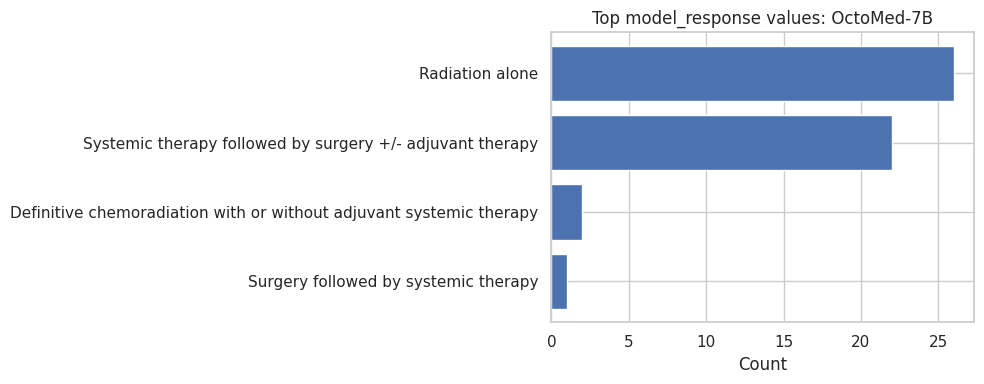

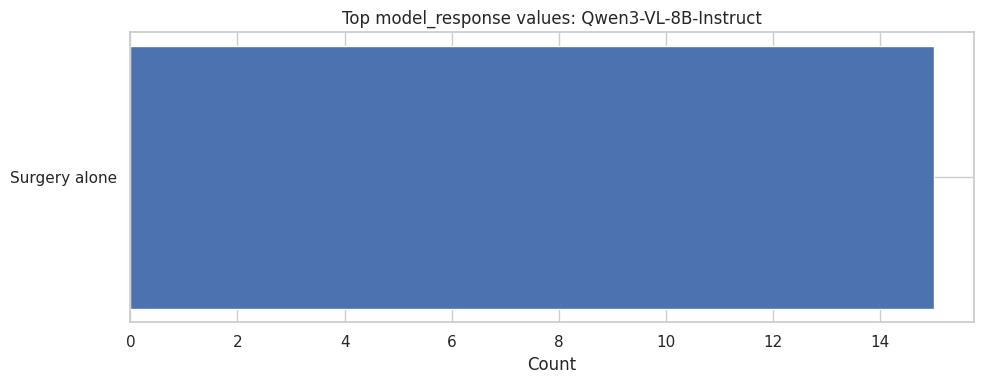

In [7]:
# Top responses by model
if 'model_response' in all_df.columns:
    top_resp = (
        all_df.assign(model_response_clean=all_df['model_response'].fillna('').astype(str).str.strip())
              .groupby(['__model', 'model_response_clean'])
              .size()
              .reset_index(name='count')
              .sort_values(['__model', 'count'], ascending=[True, False])
    )
    top_resp_by_model = top_resp.groupby('__model').head(10)
    display(top_resp_by_model)

    for model in top_resp_by_model['__model'].unique():
        d = top_resp_by_model[top_resp_by_model['__model'] == model]
        plt.figure(figsize=(10, 4))
        plt.barh(d['model_response_clean'][::-1], d['count'][::-1])
        plt.title(f'Top model_response values: {model}')
        plt.xlabel('Count')
        plt.tight_layout()
        plt.show()
else:
    print('No model_response column found.')


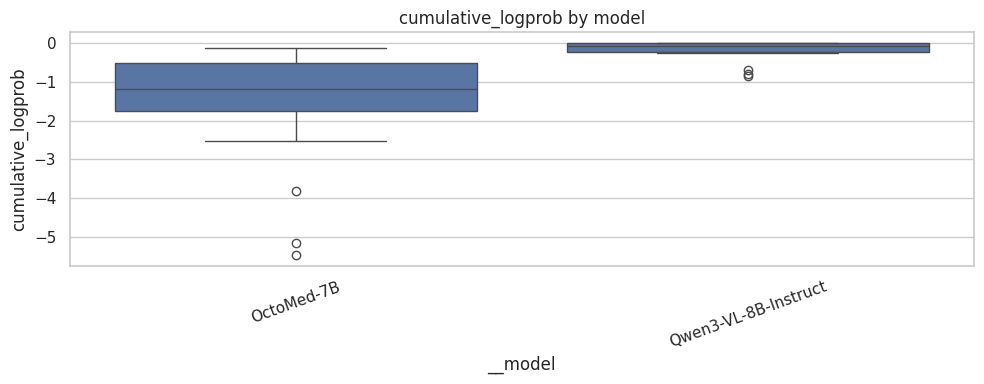

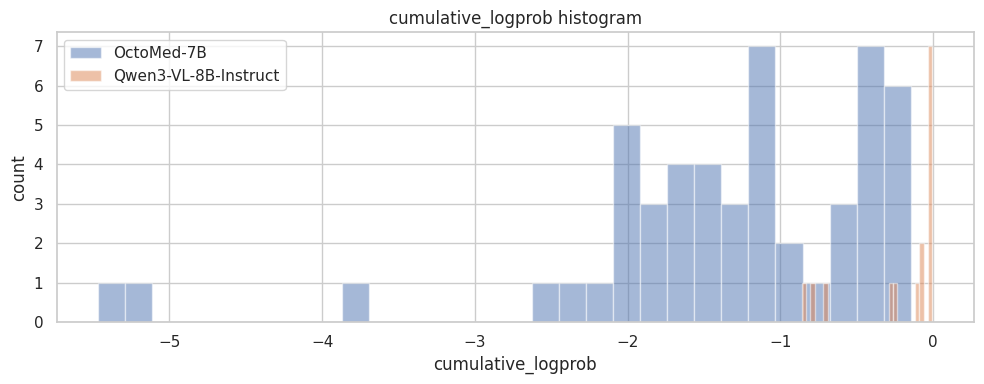

In [8]:
# cumulative_logprob distribution
if 'cumulative_logprob' in all_df.columns:
    lp = all_df[['__model', 'cumulative_logprob']].dropna().copy()
    if not lp.empty:
        plt.figure(figsize=(10, 4))
        if sns is not None:
            sns.boxplot(data=lp, x='__model', y='cumulative_logprob')
        else:
            models = sorted(lp['__model'].unique())
            data = [lp[lp['__model'] == m]['cumulative_logprob'].values for m in models]
            plt.boxplot(data, labels=models)
        plt.title('cumulative_logprob by model')
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(10, 4))
        for m, d in lp.groupby('__model'):
            plt.hist(d['cumulative_logprob'], bins=30, alpha=0.5, label=m)
        plt.title('cumulative_logprob histogram')
        plt.xlabel('cumulative_logprob')
        plt.ylabel('count')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print('No non-null cumulative_logprob values found.')
else:
    print('No cumulative_logprob column found.')


In [11]:
# Inspect one parsed log_probs sample per model
def parse_log_probs_cell(x):
    if pd.isna(x):
        return None
    x = str(x).strip()
    if not x:
        return None
    try:
        return json.loads(x)
    except Exception:
        return None

examples = []
if 'log_probs' in all_df.columns:
    for model, d in all_df.groupby('__model'):
        sample = d['log_probs'].dropna().head(1)
        if sample.empty:
            examples.append({'model': model, 'parsed': False, 'first_position_candidates': None})
            continue
        parsed = parse_log_probs_cell(sample.iloc[0])
        if not parsed or not isinstance(parsed, list) or len(parsed) == 0 or parsed[0] is None:
            examples.append({'model': model, 'parsed': False, 'first_position_candidates': None})
            continue
        first_pos = parsed[0]
        if isinstance(first_pos, list):
            candidates = [
                {
                    'decoded_token': e.get('decoded_token'),
                    'logprob': e.get('logprob'),
                    'rank': e.get('rank')
                }
                for e in first_pos[:10] if isinstance(e, dict)
            ]
        else:
            candidates = None
        examples.append({'model': model, 'parsed': True, 'first_position_candidates': candidates})
        pd.DataFrame(examples)
else:
    print('No log_probs column found.')


In [12]:
# View focused columns
focus_cols = [
    c for c in ['__model', 'index', 'label', 'model_response', 'cumulative_logprob', 'log_probs']
    if c in all_df.columns
]
all_df[focus_cols].head(20)


,__model,index,label,model_response,cumulative_logprob,log_probs
0,OctoMed-7B,5902,3,Radiation alone,-1.060626,"[[{""token_id"": 49, ""logprob"": -0.4493464529514313, ""rank"": 1, ""decoded_token"": ""R""}, {""token_id"": 2320, ""logprob"": -1.6993464231491089, ""rank"": 2, ""decoded_token"": ""System""}], [{""token_id"": 64, ""l..."
1,OctoMed-7B,6040,-1,Systemic therapy followed by surgery +/- adjuvant therapy,-0.398453,"[[{""token_id"": 2320, ""logprob"": -0.39658963680267334, ""rank"": 1, ""decoded_token"": ""System""}, {""token_id"": 49, ""logprob"": -1.7090896368026733, ""rank"": 2, ""decoded_token"": ""R""}], [{""token_id"": 292, ..."
2,OctoMed-7B,6108,0,Systemic therapy followed by surgery +/- adjuvant therapy,-1.940594,"[[{""token_id"": 2320, ""logprob"": -0.6131117343902588, ""rank"": 1, ""decoded_token"": ""System""}, {""token_id"": 49, ""logprob"": -1.5506117343902588, ""rank"": 2, ""decoded_token"": ""R""}], [{""token_id"": 292, ""..."
3,OctoMed-7B,6189,2,Radiation alone,-2.298664,"[[{""token_id"": 49, ""logprob"": -0.7621243596076965, ""rank"": 1, ""decoded_token"": ""R""}, {""token_id"": 2320, ""logprob"": -1.0433743000030518, ""rank"": 2, ""decoded_token"": ""System""}], [{""token_id"": 64, ""l..."
4,OctoMed-7B,6202,-1,Radiation alone,-1.431960,"[[{""token_id"": 49, ""logprob"": -0.409309983253479, ""rank"": 1, ""decoded_token"": ""R""}, {""token_id"": 2320, ""logprob"": -1.596809983253479, ""rank"": 2, ""decoded_token"": ""System""}], [{""token_id"": 64, ""log..."
5,OctoMed-7B,6228,-1,Radiation alone,-1.254086,"[[{""token_id"": 49, ""logprob"": -0.358690083026886, ""rank"": 1, ""decoded_token"": ""R""}, {""token_id"": 2320, ""logprob"": -1.6086900234222412, ""rank"": 2, ""decoded_token"": ""System""}], [{""token_id"": 64, ""lo..."
6,OctoMed-7B,6251,2,Systemic therapy followed by surgery +/- adjuvant therapy,-0.449037,"[[{""token_id"": 2320, ""logprob"": -0.4448811411857605, ""rank"": 1, ""decoded_token"": ""System""}, {""token_id"": 49, ""logprob"": -1.5386312007904053, ""rank"": 2, ""decoded_token"": ""R""}], [{""token_id"": 292, ""..."
7,OctoMed-7B,6284,0,Radiation alone,-1.497641,"[[{""token_id"": 49, ""logprob"": -0.5166330933570862, ""rank"": 1, ""decoded_token"": ""R""}, {""token_id"": 2320, ""logprob"": -1.4853830337524414, ""rank"": 2, ""decoded_token"": ""System""}], [{""token_id"": 64, ""l..."
8,OctoMed-7B,6301,0,Systemic therapy followed by surgery +/- adjuvant therapy,-0.265124,"[[{""token_id"": 2320, ""logprob"": -0.25999125838279724, ""rank"": 1, ""decoded_token"": ""System""}, {""token_id"": 49, ""logprob"": -2.22874116897583, ""rank"": 2, ""decoded_token"": ""R""}], [{""token_id"": 292, ""l..."
9,OctoMed-7B,6467,3,Radiation alone,-1.255146,"[[{""token_id"": 49, ""logprob"": -0.1389046013355255, ""rank"": 1, ""decoded_token"": ""R""}, {""token_id"": 2320, ""logprob"": -2.670154571533203, ""rank"": 2, ""decoded_token"": ""System""}], [{""token_id"": 64, ""lo..."


In [20]:
all_df.loc[all_df["__model"] != "OctoMed-7B", "log_probs"][51]

'[[{"token_id": 50, "logprob": -0.0036678914912045, "rank": 1, "decoded_token": "S"}, {"token_id": 2320, "logprob": -5.628667831420898, "rank": 2, "decoded_token": "System"}], [{"token_id": 84292, "logprob": -2.753696753643453e-05, "rank": 1, "decoded_token": "urgery"}, {"token_id": 5556, "logprob": -10.500027656555176, "rank": 2, "decoded_token": "urg"}], [{"token_id": 7484, "logprob": -0.006715348921716213, "rank": 1, "decoded_token": " alone"}, {"token_id": 8110, "logprob": -5.006715297698975, "rank": 2, "decoded_token": " followed"}], [{"token_id": 151645, "logprob": 0.0, "rank": 1, "decoded_token": "<|im_end|>"}, {"token_id": 0, "logprob": -Infinity, "rank": 2, "decoded_token": "!"}]]'